# Loading the required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv(r"D:\Projects\Crop Prediction\Crop Recommendation\Crop_recommendation.csv")

In [3]:
print(dataset.head())
print(dataset.info())
dataset.describe()

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
dataset.shape

(2200, 8)

In [6]:
x = dataset.iloc[:,:-1]
y = dataset["label"]  # All rows, last column only

# Label Encoding


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Print the mapping of labels to encoded values
for index, label in enumerate(label_encoder.classes_):
    print(f"{label} --> {index}")


apple --> 0
banana --> 1
blackgram --> 2
chickpea --> 3
coconut --> 4
coffee --> 5
cotton --> 6
grapes --> 7
jute --> 8
kidneybeans --> 9
lentil --> 10
maize --> 11
mango --> 12
mothbeans --> 13
mungbean --> 14
muskmelon --> 15
orange --> 16
papaya --> 17
pigeonpeas --> 18
pomegranate --> 19
rice --> 20
watermelon --> 21


# Correlation Matrix


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


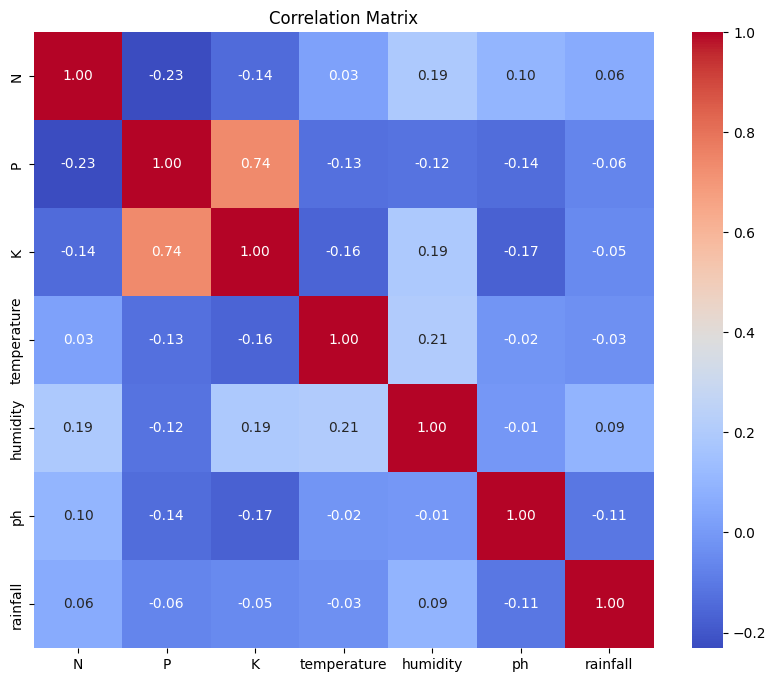

In [8]:
numeric_df = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Train_Test_Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

# Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
print(rf_model.score(x_train, y_train) * 100)
print(rf_model.score(x_test, y_test) * 100)

100.0
99.31818181818181


Accuracy Score: 0.9931818181818182

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.

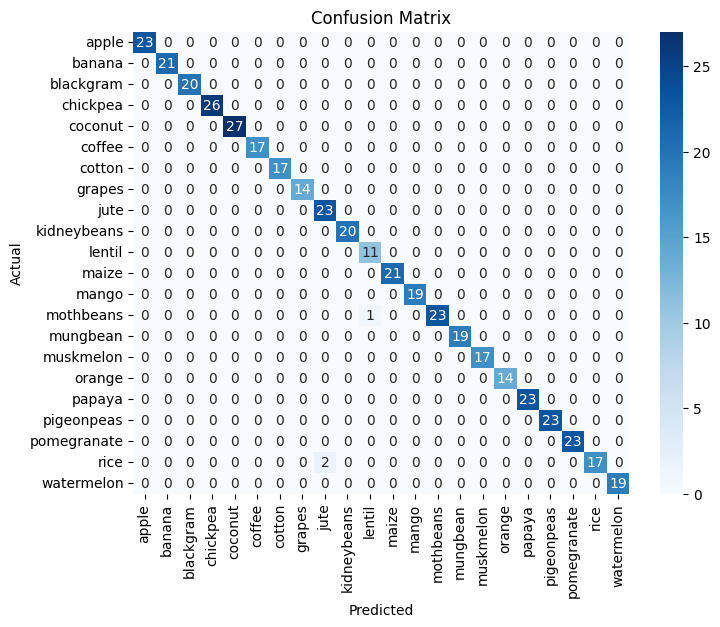

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = rf_model.predict(x_test)

#Accuracy Score:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
import os
import joblib

# Create 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the trained RandomForestClassifier model
joblib.dump(rf_model, 'model/rf_model.pkl')

print("Model saved to model/rf_model.pkl")


Model saved to model/rf_model.pkl


In [17]:
# Save the label encoder as well
joblib.dump(label_encoder, 'model/label_encoder.pkl')


['model/label_encoder.pkl']

# Decision Tree Classifier

In [15]:
'''from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

print(dt_model.score(x_train, y_train)*100)
print(dt_model.score(x_test, y_test) * 100)'''

'from sklearn.tree import DecisionTreeClassifier\ndt_model = DecisionTreeClassifier()\ndt_model.fit(x_train, y_train)\n\nprint(dt_model.score(x_train, y_train)*100)\nprint(dt_model.score(x_test, y_test) * 100)'

# K-Nearest Neighbors Classifier

In [16]:
'''from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN - Confusion Matrix')
plt.show()'''


'from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import classification_report, accuracy_score, confusion_matrix\n\nknn_model = KNeighborsClassifier(n_neighbors=5)\nknn_model.fit(x_train, y_train)\n\ny_pred = knn_model.predict(x_test)\n\nprint("Accuracy Score:", accuracy_score(y_test, y_pred))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n\nprint("Accuracy Score:", accuracy_score(y_test, y_pred))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n\nplt.figure(figsize=(8, 6))\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\',\n            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'Actual\')\nplt.title(\'KNN - Confusion Matrix\')\nplt.show()'